## Importing Librabries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import sqlite3
import folium
from geopy.geocoders import Nominatim
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

## Database Connection

In [2]:
import psycopg2

In [3]:
conn = psycopg2.connect(dbname='yelp', user='postgres', password='****', host='localhost', port='5432')

In [4]:
tables = pd.read_sql_query(''' SELECT table_name FROM information_schema.tables where table_schema = 'public' ''',conn)

In [5]:
tables

,table_name
0,business
1,checkin
2,review
3,tip
4,users


In [6]:
for table in tables['table_name']:
    display(pd.read_sql_query(f''' select * from {table} limit 5''',conn))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


,review_id,user_id,business_id,stars,useful,funny,cool,text_message,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,user_id,business_id,tip_text,tip_date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


## Data Analysis

In [7]:
# total number of business 
pd.read_sql_query(''' select count(*) from business''',conn)

,count
0,150346


In [8]:
# filtering out only those business which are related to resturant and their working status is open
business_id = pd.read_sql_query(''' select business_id from business where lower(categories) like '%restaurant%' and is_open = 1 ''',conn)

In [9]:
business_id.shape

(35004, 1)

In [10]:
# calculating avg,min,max,median stats for review count and star rating for business
pd.read_sql_query(f''' select round(avg(review_count),2) as avg_review_count, 
                       min(review_count) as min_review_count, 
                       max(review_count) as max_review_count,
                       (select review_count from business order by review_count limit 1 offset (select count(*) from business)/2) as median_review_count,

                       round(cast(avg(stars) as numeric),2) as avg_star_rating, 
                       min(stars) as min_star_rating, 
                       max(stars) as max_star_rating,
                       (select stars from business order by review_count limit 1 offset (select count(*) from business)/2) as median_star_rating
                       
                       from business where business_id IN {tuple(business_id['business_id'])}''',conn).transpose()
                       

,0
avg_review_count,104.10
min_review_count,5.00
max_review_count,7568.00
median_review_count,15.00
avg_star_rating,3.52
min_star_rating,1.00
max_star_rating,5.00
median_star_rating,3.50


In [11]:
def remove_outlier(df,col):

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


In [12]:
# filtering out only those business which are related to resturant and their working status is open
business_id = pd.read_sql_query(''' select business_id,review_count from business where lower(categories) like '%restaurant%' and is_open = 1 ''',conn)

In [13]:
business_id.shape

(35004, 2)

In [14]:
business_id = remove_outlier(business_id,'review_count')

In [15]:
# shape of business_id after removal of outlier
business_id.shape

(31537, 2)

In [16]:
# calculating avg,min,max,median stats for review count and star rating for business
pd.read_sql_query(f''' select round(avg(review_count),2) as avg_review_count, 
                       min(review_count) as min_review_count, 
                       max(review_count) as max_review_count,
                       (select review_count from business order by review_count limit 1 offset (select count(*) from business)/2) as median_review_count,

                       round(cast(avg(stars) as numeric),2) as avg_star_rating, 
                       min(stars) as min_star_rating, 
                       max(stars) as max_star_rating,
                       (select stars from business order by review_count limit 1 offset (select count(*) from business)/2) as median_star_rating
                       
                       from business where business_id IN {tuple(business_id['business_id'])}''',conn).transpose()

,0
avg_review_count,55.98
min_review_count,5.00
max_review_count,248.00
median_review_count,15.00
avg_star_rating,3.48
min_star_rating,1.00
max_star_rating,5.00
median_star_rating,2.50


In [17]:
# checking which resturant has highest number of reviews.
pd.read_sql_query(f''' select name, sum(review_count) as review_count, round(cast(avg(stars) as numeric),2) as avg_rating
                       from business
                       where business_id in {tuple(business_id['business_id'])}
                       group by name
                       order by review_count desc
                       limit 10 ''',conn)

,name,review_count,avg_rating
0,McDonald's,16490,1.87
1,Chipotle Mexican Grill,9071,2.38
2,Taco Bell,8017,2.14
3,Chick-fil-A,7687,3.38
4,First Watch,6761,3.88
5,Panera Bread,6613,2.66
6,Buffalo Wild Wings,6483,2.34
7,Domino's Pizza,6091,2.29
8,Wendy's,5930,2.03
9,Chili's,5744,2.51


In [18]:
# checking which resturant has highest rating.
pd.read_sql_query(f''' select name, sum(review_count) as review_count, round(cast(avg(stars) as numeric),2) as avg_rating
                       from business
                       where business_id in {tuple(business_id['business_id'])}
                       group by name
                       order by avg_rating desc
                       limit 10 ''',conn)

,name,review_count,avg_rating
0,Taqueria La Coyota,7,5.0
1,Keson Thai Restaurant,23,5.0
2,Mazzanti's Market,74,5.0
3,Kimberton Whole Foods - Malvern,22,5.0
4,Hole in One Donuts - Brandon,85,5.0
5,Top Out Cafe,21,5.0
6,2 Street Sammies,19,5.0
7,The Catio Cat Lounge,10,5.0
8,Mommy Telly's Famous BBQ,14,5.0
9,Uptown Eats,57,5.0


In [19]:
# calculating checkin count for all the business
pd. read_sql_query ('''select business_id, sum( length(date) - length( replace(date,',' ,''))+1) as checkin_count
                        from checkin 
                        group by business_id '''
                        , conn)

,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--_9CAxgfXZmoFdNIRrhHA,136
2,--_lZuj_WCGnDG6n0emlRg,30
3,--0iUa4sNDFiZFrAdIWhZQ,10
4,--30_8IhuyMHbSOcNWd6DQ,2
...,...,...
131925,ZZYV8hA0Ty93TeDKW4_bBw,14
131926,ZZyVnWiMjySRcFOTmpMS3w,11
131927,zzyx5x0Z7xXWWvWnZFuxlQ,1
131928,ZzzJ2jAPFJQGehBKcrZCYQ,49


In [20]:
# calculating tip count for all the business
pd. read_sql_query ('''select business_id, count(*) as tip_count
                        from tip 
                        group by business_id '''
                        , conn)

,business_id,tip_count
0,V9ajbgVgiZfR0mD-ZRerDw,6
1,xyt8FfA4idSSMLIRQsDPGg,9
2,JbyHeQe-Ifn3FPpp0LATwA,4
3,DuPI1X-jU80Cyp_L7k46Mg,4
4,zXm3SIx6L0WEXJNVzKUq0Q,1
...,...,...
106188,PQ7sOybwQrnXTmHRsC9X7w,3
106189,z77ABD_iz8lAGOJM5UPljg,1
106190,_dDW5rc7MKCOzhRewe3Kfg,4
106191,f1y5rQCSyQ0z7OKRexWzXQ,2


In [21]:
review_count_df = pd. read_sql_query(f''' SELECT total.avg_rating as rating,
                        ROUND(AVG (total. review_count),2) as avg_review_count,
                        ROUND(AVG( total.checkin_count),2) as avg_checkin_count,
                        ROUND(AVG (total. tip_count),2) as avg_tip_count
                        FROM ( SELECT
                               b. business_id,
                               SUM(b. review_count) AS review_count,
                               AVG (b.stars) As avg_rating,
                               SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date,',','')) + 1) AS checkin_count,
                               SUM (tip. tip_count) as tip_count
                               FROM business b
                               LEFT JOIN checkin cc ON b.business_id = cc. business_id
                               LEFT JOIN ( select business_id, count(business_id) as tip_count from tip GROUP BY business_id ORDER BY tip_count) as tip on b.business_id =tip.business_id
                               WHERE b.business_id IN {tuple(business_id ['business_id'])}
                               GROUP BY
                                     b.business_id) as total
                        GROUP BY total.avg_rating 
                        ORDER BY rating''', conn)
                        

In [22]:
review_count_df

,rating,avg_review_count,avg_checkin_count,avg_tip_count
0,1.0,14.37,17.52,2.78
1,1.5,24.36,34.48,3.88
2,2.0,27.76,52.39,4.58
3,2.5,36.63,79.35,6.33
4,3.0,48.05,105.97,8.30
5,3.5,63.73,125.78,10.32
6,4.0,73.14,127.14,11.33
7,4.5,65.28,86.18,9.00
8,5.0,31.13,27.55,4.27


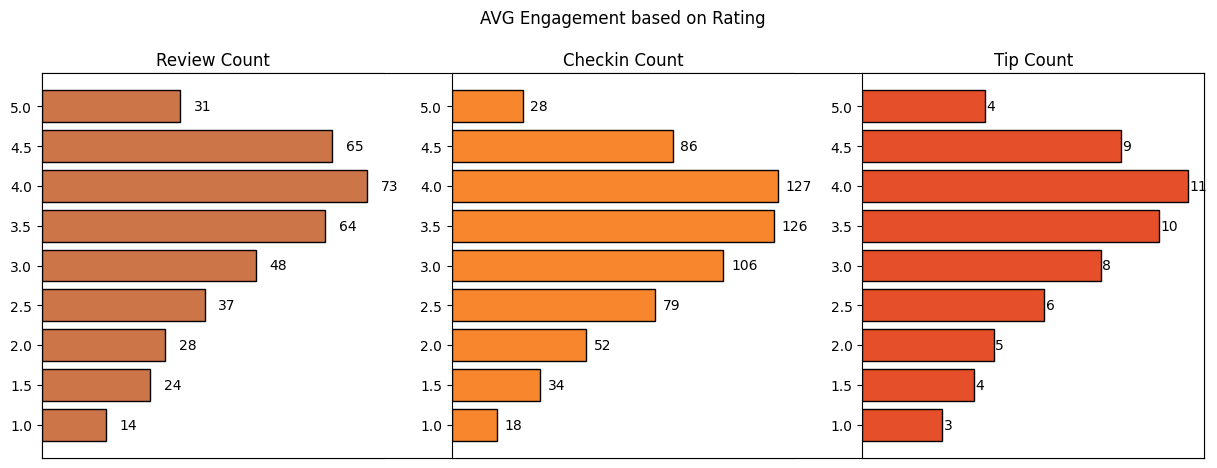

In [23]:
plt.figure(figsize=(15,5))
plt.title('AVG Engagement based on Rating\n\n')
plt.yticks([])
plt.xticks([])
plt.subplot(1,3,1)
plt.title('Review Count')
plt.barh(review_count_df['rating'].astype('str'),review_count_df['avg_review_count'], edgecolor = 'k', color = '#CB7548')
plt.gca().spines['right'].set_visible(False)

for i,value in enumerate(review_count_df['avg_review_count']):
    plt.text(value+3,i, str(round(value)), color='black', va='center')
                          
plt.xticks([])
plt.subplot (1,3,2)
plt.title('Checkin Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_checkin_count'], edgecolor = 'k', color = '#F8862C')
plt.gca().spines['right'].set_visible(False)

for i,value in enumerate(review_count_df['avg_checkin_count']):
    plt.text(value+3, i, str(round (value)), color='black', va='center') 
    

plt.xticks([])
plt.subplot (1,3,3)
plt.title('Tip Count' )
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_tip_count'],edgecolor = 'k', color='#E54F29')

for i, value in enumerate(review_count_df['avg_tip_count']):
    plt.text(value+0.05, i, str(round(value)), color='black', va='center')
               
plt.xticks( [])
plt.show()


In [24]:
# Checking wether their is a correlation between number of reviews, tip count and checkin count for a business.

engagment_df = pd. read_sql_query(f''' SELECT
                       b. business_id,
                       SUM(b. review_count) AS review_count,
                       AVG (b.stars) As avg_rating,
                       SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date,',','')) + 1) AS checkin_count,
                       SUM (tip. tip_count) as tip_count,
                       (CASE when b.stars >= 3.5 then 'High Rated' else 'Low Rated' end) as category
                       FROM business b
                       LEFT JOIN checkin cc ON b.business_id = cc. business_id
                       LEFT JOIN ( select business_id, count(business_id) as tip_count from tip GROUP BY business_id ORDER BY tip_count) as tip on b.business_id =tip.business_id
                       WHERE b.business_id IN {tuple(business_id ['business_id'])}
                       GROUP BY b.business_id
                        ''', conn).dropna()
                        

In [25]:
engagment_df[['review_count','checkin_count','tip_count']].corr()

,review_count,checkin_count,tip_count
review_count,1.000000,0.626884,0.766321
checkin_count,0.626884,1.000000,0.772088
tip_count,0.766321,0.772088,1.000000


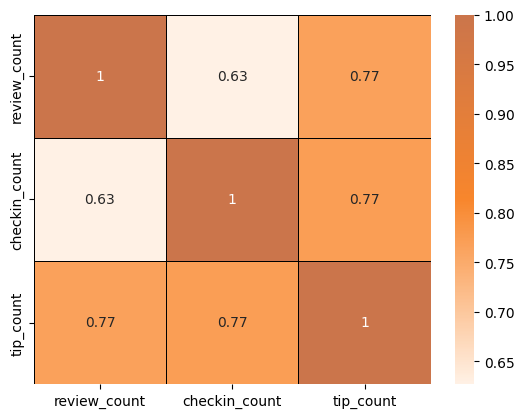

In [26]:
colors = ["#FFF1E5", "#F8862C", "#CB754B"]
custom_cmap = LinearSegmentedColormap.from_list("mycmap", colors)
sns. heatmap(engagment_df[['review_count', 'checkin_count', 'tip_count']].corr(), cmap = custom_cmap, annot = True, linewidths = 0.5, linecolor ='black')
plt.show()

In [27]:
# Is there is a diffference in the user engagment (number of reviews, tip count and checkin count) between high-rated and low-rated business.
engagment_df.groupby('category')[['review_count','checkin_count','tip_count']].mean().round(2).reset_index()

,category,review_count,checkin_count,tip_count
0,High Rated,72.29,122.07,10.16
1,Low Rated,42.12,88.88,6.54


In [28]:
# function to calculate the success score based on the avg rating and total review count 

def calculate_success_metric(df) :
    success_score = []
    for index, row in df.iterrows ():
        score = row['avg_rating'] * np.log(row['review_count'] + 1)
        success_score. append (score)
        
    return success_score

In [29]:
# How do the success metrics (review_count or avg_rating) of restaurants vary across different states and city

city_df = pd.read_sql_query(f'''select city, state,avg(latitude) as latitude,avg(longitude) as longitude,
                                round(cast(AVG(stars) as numeric),2) as avg_rating, 
                               SUM(review_count) as review_count, count(*) as restaurant_count 
                               from business
                               WHERE business_id IN {tuple(business_id ['business_id'])} 
                               group by state, city
                               order by review_count desc
                               Limit 10 ''', conn)

In [30]:
city_df['sucess_score'] = calculate_success_metric(city_df)

In [31]:
city_df

,city,state,latitude,longitude,avg_rating,review_count,restaurant_count,sucess_score
0,Philadelphia,PA,39.982284,-75.149996,3.53,175487,3001,42.625901
1,Tampa,FL,28.001652,-82.476953,3.57,104376,1715,41.254080
2,Indianapolis,IN,39.802349,-86.141398,3.41,92639,1701,38.998384
3,Tucson,AZ,32.233991,-110.936458,3.39,91613,1419,38.731900
4,Nashville,TN,36.142298,-86.770105,3.49,87070,1404,39.696932
5,New Orleans,LA,29.961275,-90.075383,3.69,69239,1012,41.126282
6,Saint Louis,MO,38.616387,-90.302794,3.41,51490,811,36.995643
7,Reno,NV,39.507456,-119.806311,3.48,48393,589,37.539216
8,Edmonton,AB,53.526253,-113.514203,3.51,45916,1546,37.678413
9,Boise,ID,43.608537,-116.239164,3.56,36104,561,37.359304


In [32]:
import folium

# Create a base map
m = folium.Map(location=[city_df['latitude'].mean(), city_df['longitude'].mean()], zoom_start=4)

# Define a color scale
color_scale = folium.LinearColormap(colors=['green', 'yellow', '#E54F29'],
                                     vmin=city_df['sucess_score'].min(),
                                     vmax=city_df['sucess_score'].max())

# Add markers to the map
for index, row in city_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],  # Corrected column name here
        radius=5,
        color=color_scale(row['sucess_score']),
        fill=True, 
        fill_color=color_scale(row['sucess_score']), 
        fill_opacity=0.7,
        popup=f"Success Score: {row['sucess_score']}"
    ).add_to(m)

# Add color scale to the map
m.add_child(color_scale)


In [33]:
# Are there any patterns in user engagement over time for successful businesses compared to less successful ones?
# Are there any seasonal trends in the user engagement for restaurants.

high_rated_engagement = pd.read_sql_query(f'''
    SELECT review.month_year, review.review_count, tip.tip_count 
    FROM (
        SELECT TO_CHAR(CAST(date AS DATE), 'MM-YYYY') AS month_year, COUNT(*) AS review_count
        FROM review
        WHERE business_id IN {tuple(business_id['business_id'])} AND stars >= 3.5
        GROUP BY month_year
        ORDER BY month_year
    ) AS review
    JOIN (
        SELECT TO_CHAR(CAST(tip.tip_date AS DATE), 'MM-YYYY') AS month_year, COUNT(*) AS tip_count
        FROM tip
        JOIN business AS b ON tip.business_id = b.business_id
        WHERE tip.business_id IN {tuple(business_id['business_id'])} AND b.stars >= 3.5
        GROUP BY month_year
        ORDER BY month_year
    ) AS tip
    ON review.month_year = tip.month_year
''', conn)

low_rated_engagement = pd.read_sql_query(f'''
    SELECT review.month_year, review.review_count, tip.tip_count 
    FROM (
        SELECT TO_CHAR(CAST(date AS DATE), 'MM-YYYY') AS month_year, COUNT(*) AS review_count
        FROM review
        WHERE business_id IN {tuple(business_id['business_id'])} AND stars < 3.5
        GROUP BY month_year
        ORDER BY month_year
    ) AS review
    JOIN (
        SELECT TO_CHAR(CAST(tip.tip_date AS DATE), 'MM-YYYY') AS month_year, COUNT(*) AS tip_count
        FROM tip
        JOIN business AS b ON tip.business_id = b.business_id
        WHERE tip.business_id IN {tuple(business_id['business_id'])} AND b.stars < 3.5
        GROUP BY month_year
        ORDER BY month_year
    ) AS tip
    ON review.month_year = tip.month_year
''', conn)


In [34]:
high_rated_engagement

,month_year,review_count,tip_count
0,01-2012,2783,1321
1,01-2018,10623,1404
2,01-2021,10082,1061
3,02-2011,1688,682
4,02-2017,8501,1677
...,...,...,...
149,07-2018,13531,1484
150,07-2021,12124,1113
151,08-2015,7973,1618
152,08-2019,14153,1594


In [35]:
low_rated_engagement

,month_year,review_count,tip_count
0,01-2012,1548,538
1,01-2018,5510,380
2,01-2021,4509,178
3,02-2011,961,335
4,02-2012,1446,599
...,...,...,...
149,11-2014,2993,351
150,11-2019,6123,274
151,11-2020,4046,154
152,12-2015,4109,496


In [36]:
time_rating = pd.read_sql_query(f''' 
    SELECT TO_CHAR(CAST(date AS DATE), 'MM-YYYY') AS month_year, AVG(stars) AS avg_rating
    FROM review
    WHERE business_id IN {tuple(business_id['business_id'])}
    GROUP BY month_year
    ORDER BY month_year
''', conn)

In [37]:
time_rating

,month_year,avg_rating
0,01-2006,4.083333
1,01-2007,3.888889
2,01-2008,3.622642
3,01-2009,3.713195
4,01-2010,3.725121
...,...,...
198,12-2017,3.624710
199,12-2018,3.607930
200,12-2019,3.669953
201,12-2020,3.840761


In [38]:
# Process time_rating DataFrame
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values('month_year', inplace=True)
time_rating = time_rating[time_rating['month_year'] > '2017']

# Process high_rated_engagement DataFrame
high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement['month_year'])
high_rated_engagement.sort_values('month_year', inplace=True)
high_rated_engagement = high_rated_engagement[high_rated_engagement['month_year'] > '2017']

# Process low_rated_engagement DataFrame
low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'])
low_rated_engagement.sort_values('month_year', inplace=True)
low_rated_engagement = low_rated_engagement[low_rated_engagement['month_year'] > '2017']


In [39]:
high_rated_engagement['avg_rating'] = time_rating['avg_rating'].values

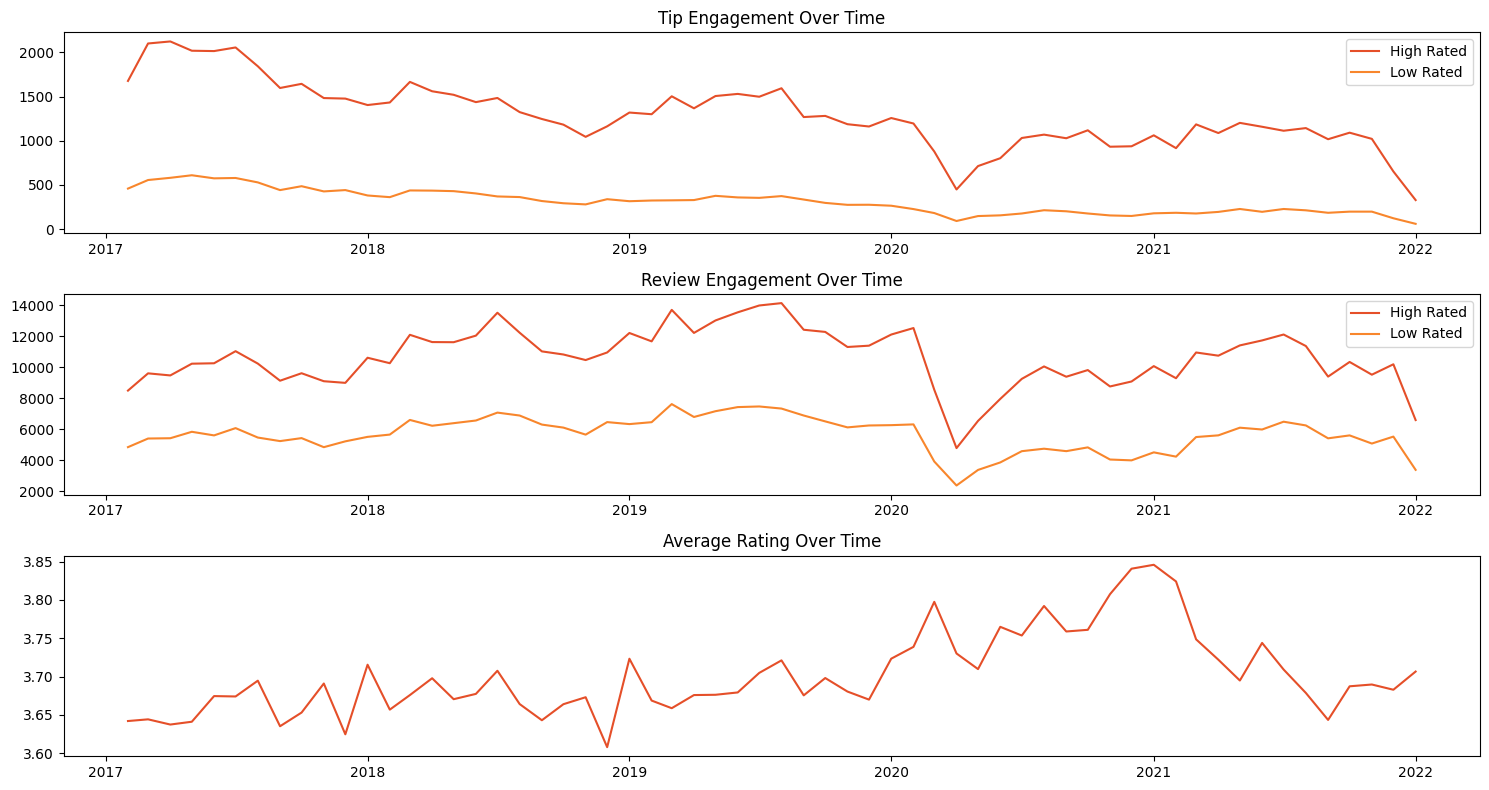

In [40]:
plt.figure(figsize=(15, 8))

# First subplot for Tip Engagement Over Time
plt.subplot(3, 1, 1)
plt.title('Tip Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['tip_count'], label='High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['tip_count'], label='Low Rated', color  = '#F8862C')
plt.legend()

# Second subplot for Review Engagement Over Time
plt.subplot(3, 1, 2)
plt.title('Review Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['review_count'], label='High Rated',color = '#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['review_count'], label='Low Rated',color  = '#F8862C')
plt.legend()

# Third subplot for Average Rating Over Time
plt.subplot(3, 1, 3)
plt.title('Average Rating Over Time')
plt.plot(time_rating['month_year'], time_rating['avg_rating'], color='#E54F29')
plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()


In [41]:
tip_high_rated = high_rated_engagement[['month_year', 'tip_count']].set_index('month_year')
review_high_rated = high_rated_engagement[['month_year', 'review_count']].set_index('month_year')
rating_df = time_rating[['month_year', 'avg_rating']].set_index('month_year')

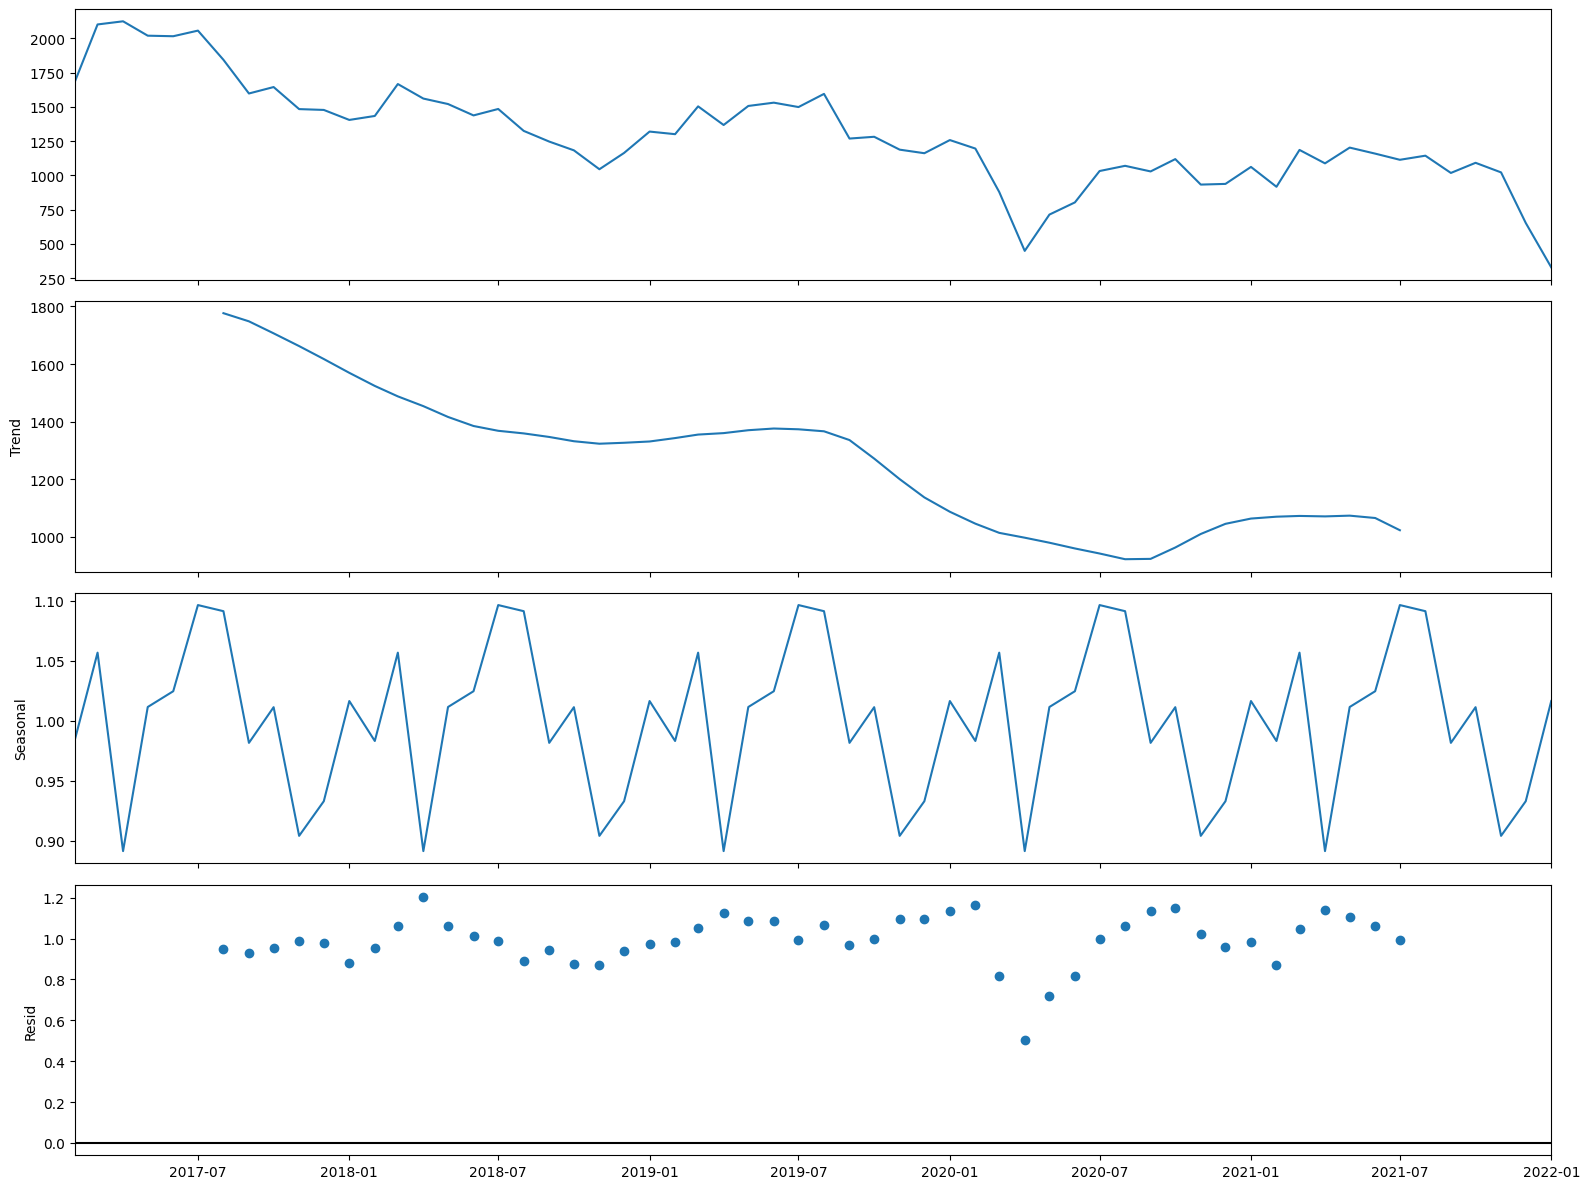

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

multiplicative_decomposition = seasonal_decompose(tip_high_rated, model='multiplicative', period=12)

plt.rcParams.update({'figure.figsize': (16, 12)})
multiplicative_decomposition.plot()
plt.show()

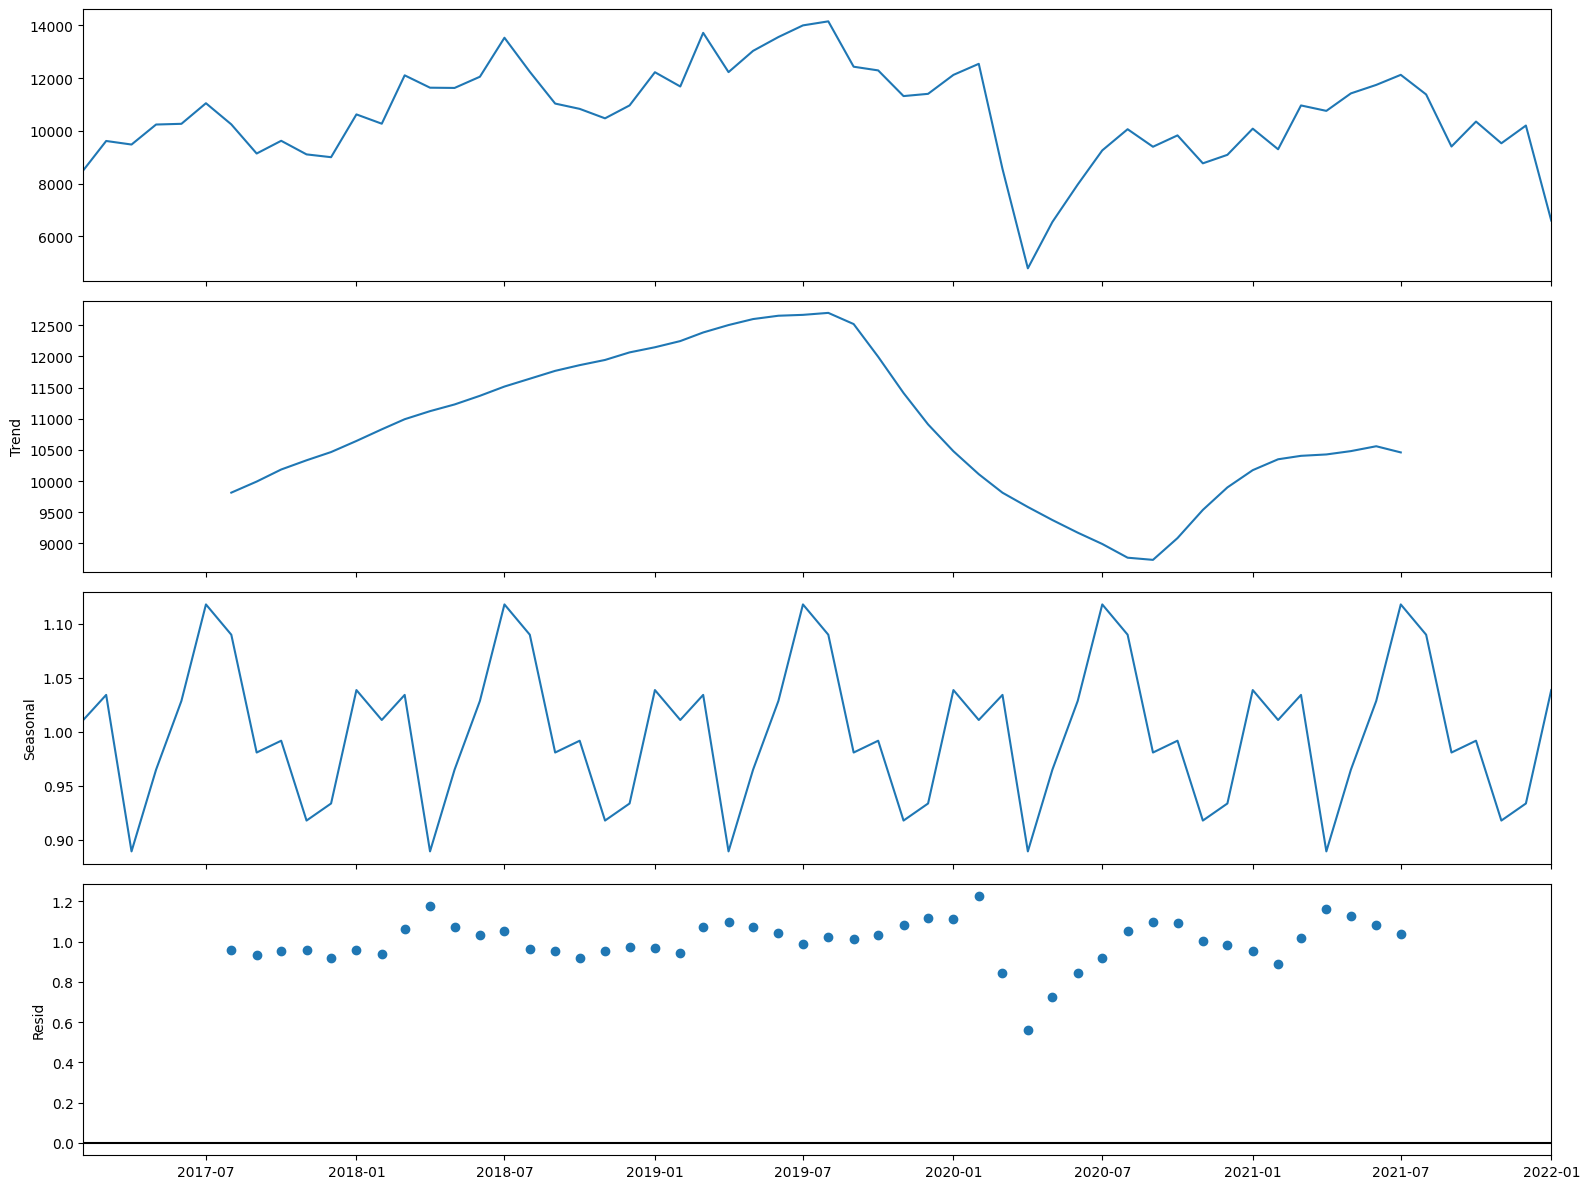

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

multiplicative_decomposition = seasonal_decompose(review_high_rated, model='multiplicative', period=12)

plt.rcParams.update({'figure.figsize': (16, 12)})
multiplicative_decomposition.plot()
plt.show()

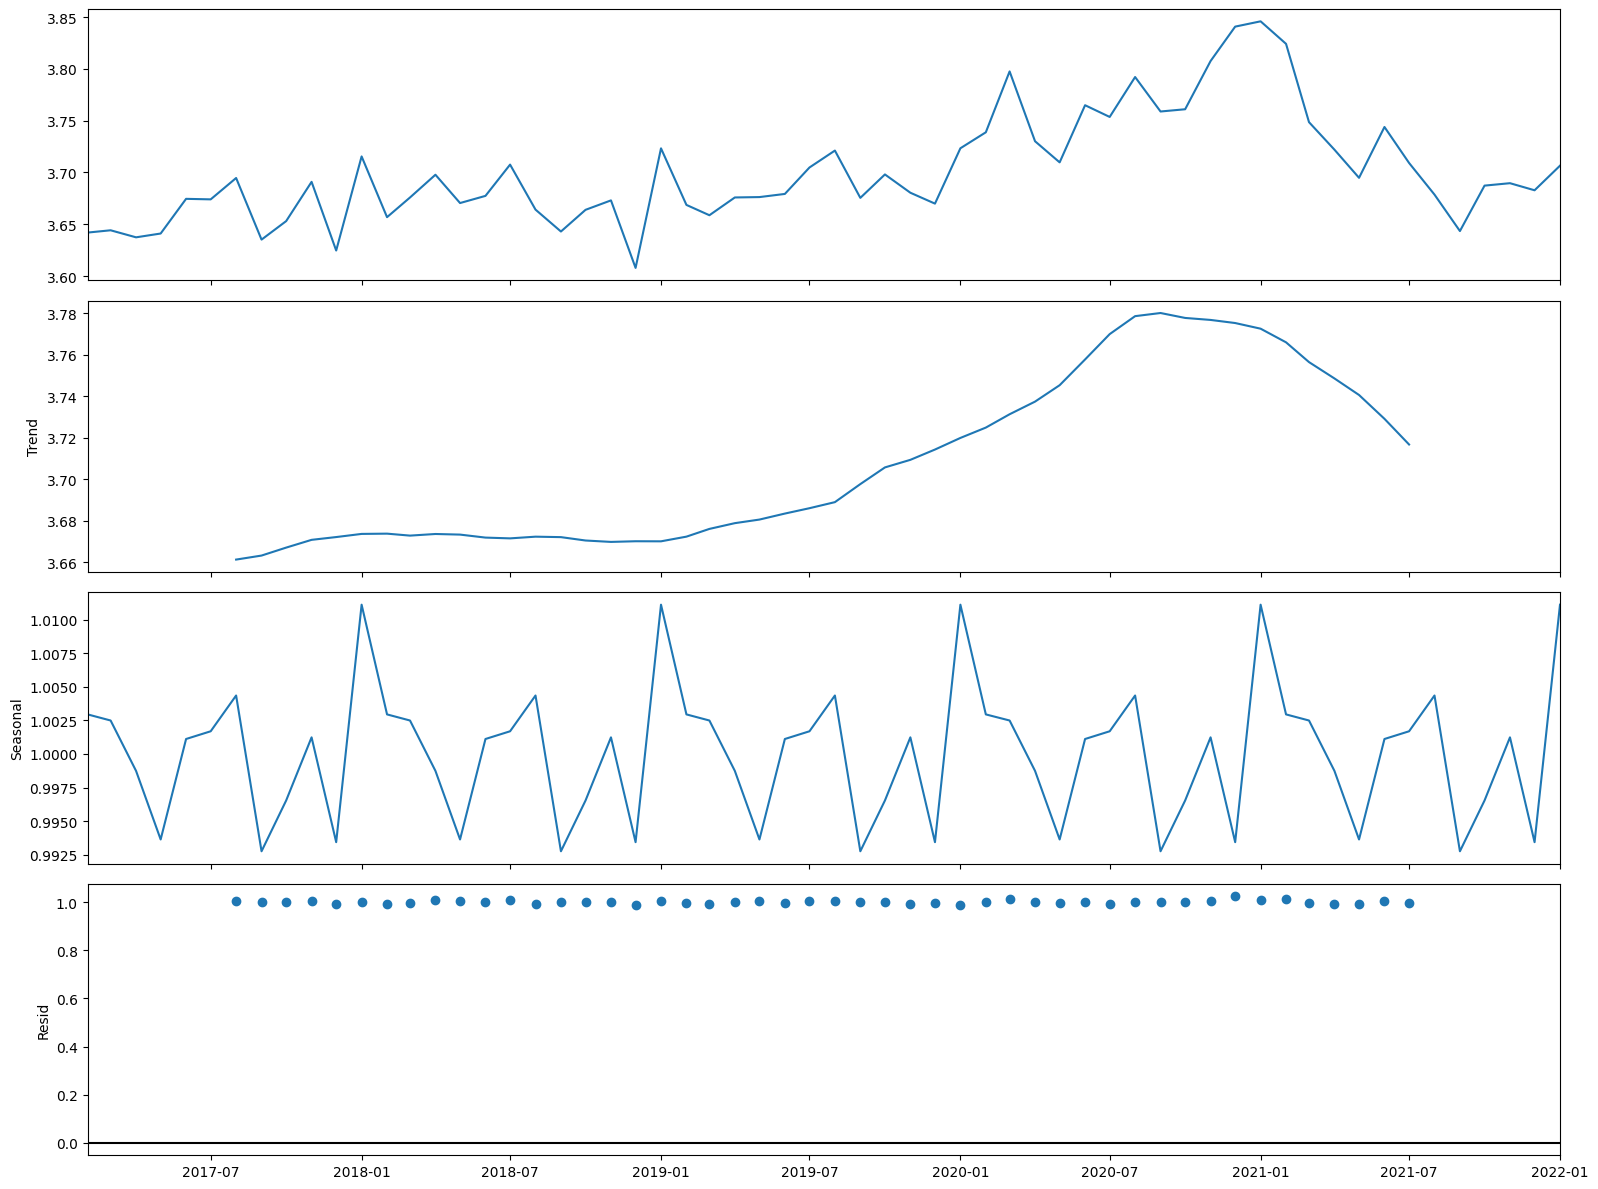

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

multiplicative_decomposition = seasonal_decompose(rating_df, model='multiplicative', period=12)

plt.rcParams.update({'figure.figsize': (16, 12)})
multiplicative_decomposition.plot()
plt.show()

In [45]:
# How does the sentiment of reviews and tips (useful, funny, cool) correlate with the success metrics of restaurants?
sentiment_df = pd.read_sql_query(f''' SELECT b.business_id, 
                             AVG(b.stars) as avg_rating,
                             SUM(b.review_count) as review_count,
                             SUM(s.useful_count) as useful_count,
                             SUM (s.funny_count) as funny_count,
                             SUM(s.cool_count) as cool_count
                      FROM ( SELECT business_id,
                                    SUM(useful) as useful_count,
                                    SUM(funny) as funny_count,
                                    SUM (cool) as cool_count
                             FROM
                                  review
                             GROUP BY business_id) as s
                     JOIN business as b on b.business_id = s.business_id
                     WHERE b.business_id IN {tuple(business_id['business_id'])}
                     GROUP BY b.business_id
                     ORDER BY review_count''', conn)

In [46]:
sentiment_df = remove_outlier(sentiment_df,'review_count')
sentiment_df = remove_outlier(sentiment_df,'useful_count')
sentiment_df = remove_outlier(sentiment_df,'funny_count')
sentiment_df = remove_outlier(sentiment_df,'cool_count')

In [47]:
sentiment_df

,business_id,avg_rating,review_count,useful_count,funny_count,cool_count
0,CCWH-7dU8-Hf3eu_EdmcQA,2.5,5,1.0,1.0,1.0
1,nWe5p-PNN2rD4-b9ap5uiQ,2.0,5,2.0,0.0,0.0
2,UYIr1d1zJr3jVYhXOoxyLg,1.0,5,3.0,4.0,0.0
3,UYhbbpuD199E7BabX93vAg,5.0,5,2.0,0.0,1.0
4,nw58qNTeh7gRyJsEZv9EIg,2.0,5,0.0,0.0,0.0
...,...,...,...,...,...,...
26333,7LKkuIJz-pkG3ni8GxmDdA,4.0,175,68.0,27.0,26.0
26339,radib3GHt_Up9-zhUjM1ew,3.5,175,128.0,29.0,21.0
26359,ZNZcptwIHne1PDcHaMbA-A,4.0,176,81.0,13.0,29.0
26365,k8C4zFZDl8GcjIapHCB77w,4.0,176,91.0,23.0,29.0


In [48]:
sentiment_df['sucess_score'] = calculate_success_metric(sentiment_df)

In [49]:
sentiment_df

,business_id,avg_rating,review_count,useful_count,funny_count,cool_count,sucess_score
0,CCWH-7dU8-Hf3eu_EdmcQA,2.5,5,1.0,1.0,1.0,4.479399
1,nWe5p-PNN2rD4-b9ap5uiQ,2.0,5,2.0,0.0,0.0,3.583519
2,UYIr1d1zJr3jVYhXOoxyLg,1.0,5,3.0,4.0,0.0,1.791759
3,UYhbbpuD199E7BabX93vAg,5.0,5,2.0,0.0,1.0,8.958797
4,nw58qNTeh7gRyJsEZv9EIg,2.0,5,0.0,0.0,0.0,3.583519
...,...,...,...,...,...,...,...
26333,7LKkuIJz-pkG3ni8GxmDdA,4.0,175,68.0,27.0,26.0,20.681936
26339,radib3GHt_Up9-zhUjM1ew,3.5,175,128.0,29.0,21.0,18.096694
26359,ZNZcptwIHne1PDcHaMbA-A,4.0,176,81.0,13.0,29.0,20.704599
26365,k8C4zFZDl8GcjIapHCB77w,4.0,176,91.0,23.0,29.0,20.704599


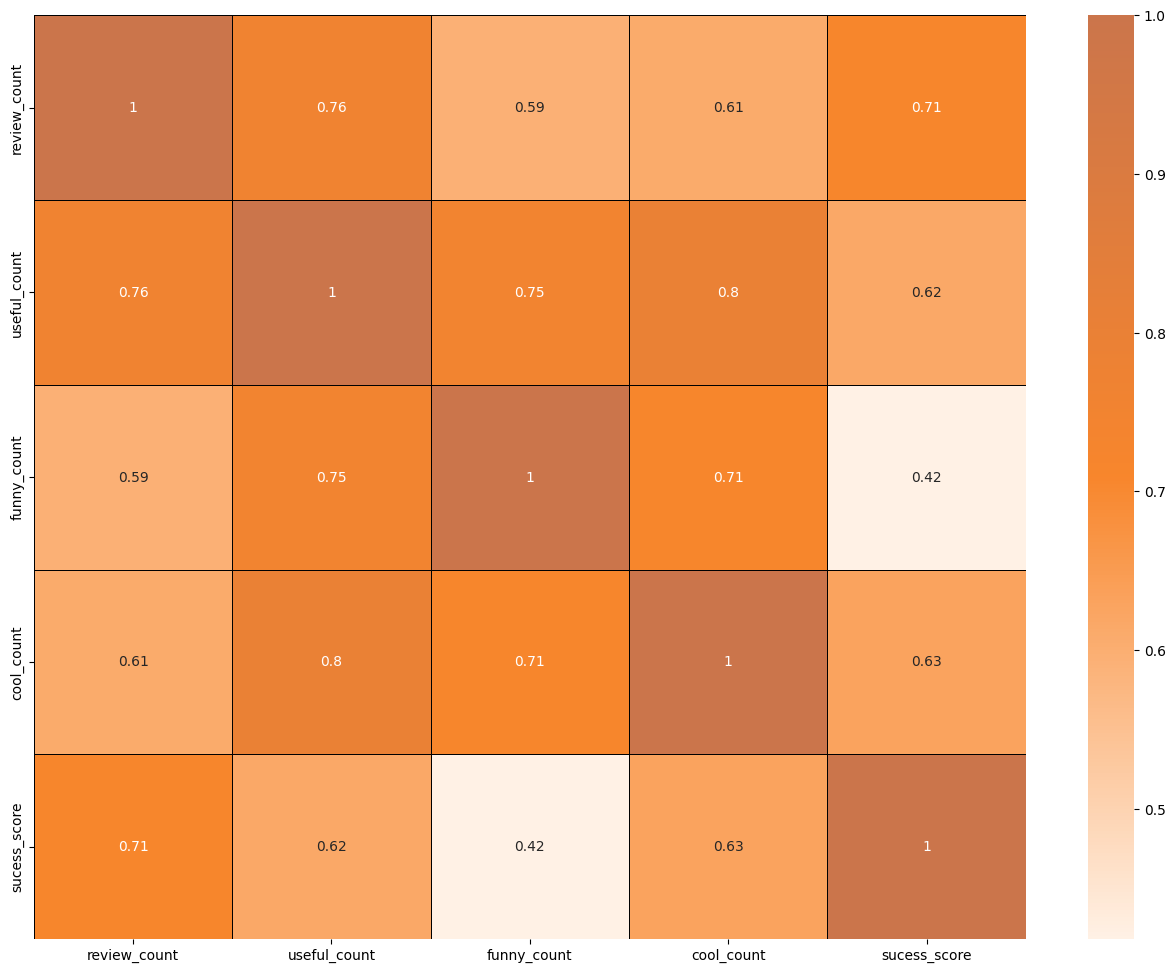

In [50]:
sns. heatmap(sentiment_df.iloc[:,2:].corr(), cmap = custom_cmap, annot = True, linewidths = 0.5, linecolor ='black')
plt.show()

In [51]:
# Is there any difference in engagement of elite users and non elite users?
elite_df = pd.read_sql_query("""
SELECT
    elite,
    COUNT(*) AS row_count,
    SUM(review_count) AS total_review_count
FROM
    (SELECT
        CASE
            WHEN elite = '' THEN 'Not Elite'
            ELSE 'Elite'
        END AS elite,
        u.review_count
    FROM
        users u) AS user_elite
GROUP BY
    elite;
""", conn)

In [52]:
elite_df

,elite,row_count,total_review_count
0,Elite,91198,20484441
1,Not Elite,1896699,26021235


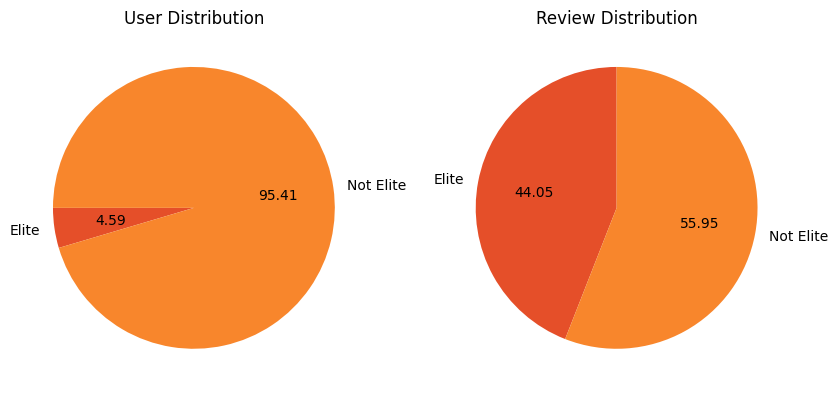

In [53]:
plt.figure(figsize=(10, 6))

# First subplot: User Distribution
plt.subplot(1, 2, 1)
plt.title("User Distribution")
plt.pie(elite_df['row_count'], labels=elite_df['elite'], autopct='%.2f', startangle=180, colors=['#E54F29', '#F8862C'])

# Second subplot: Review Distribution
plt.subplot(1, 2, 2)
plt.title('Review Distribution')
plt.pie(elite_df['total_review_count'], labels=elite_df['elite'], autopct='%.2f', startangle=90, colors=['#E54F29', '#F8862C'])

plt.show()


In [54]:

review_engagement = pd.read_sql_query("""
SELECT
    EXTRACT(HOUR FROM review_date) AS hour,
    COUNT(*) AS review_count
FROM
    (SELECT *,
        cast(date as timestamp) as review_date
     FROM 
        review) AS review_dates
GROUP BY
    hour;
""", conn)

tip_engagement = pd.read_sql_query("""
SELECT
    EXTRACT(HOUR FROM tip_dates) AS hour,
    COUNT(*) AS tip_count
FROM
     (SELECT *,
        cast(tip_date as timestamp) as tip_dates
     FROM 
        tip) AS tip
GROUP BY
    hour;
""", conn)

user_checkin = pd.read_sql_query("""
SELECT date 
FROM 
    checkin
""",conn)


In [55]:
review_engagement.shape, tip_engagement.shape,user_checkin.shape

((24, 2), (24, 2), (131930, 1))

In [56]:
import datetime

# Splitting comma-separated values and creating a list of individual dates
dates_list = user_checkin['date'].str.split(', ')

# Flattening the list of dates
dates_flat = [date for sublist in dates_list for date in sublist]

# Converting each date string to datetime and extracting the hour
hour_list = [datetime.datetime.strptime(date.strip(), '%Y-%m-%d %H:%M:%S').strftime('%H') for date in dates_flat]

# Creating a new DataFrame with the extracted hour data
checkin_engagement = pd.DataFrame(hour_list, columns=['hour']).groupby('hour').size().reset_index(name='checkin_count')


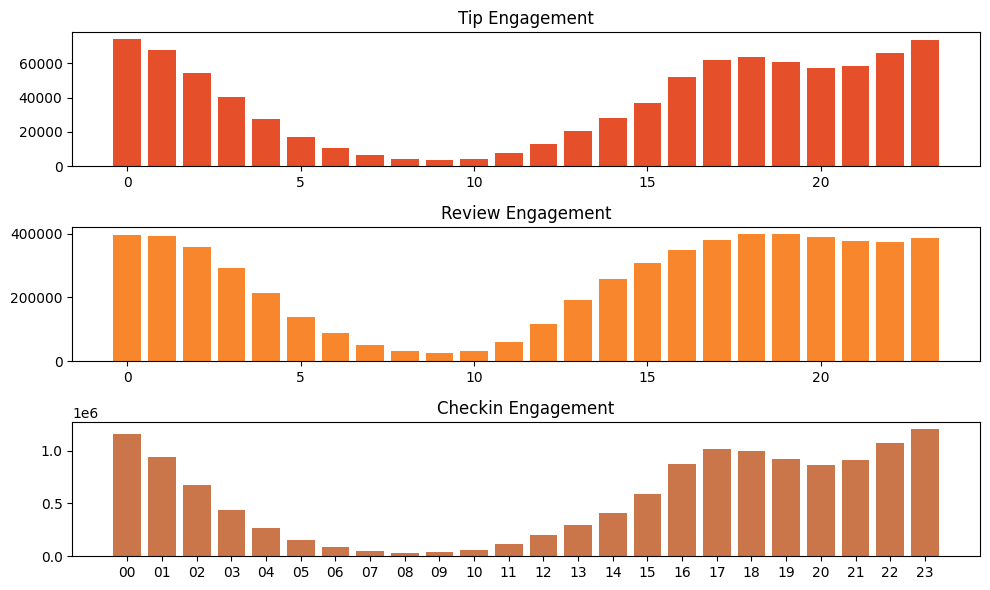

In [57]:
plt.figure(figsize=(10,6))

plt.subplot(3, 1, 1)
plt.title('Tip Engagement')
plt.bar(tip_engagement['hour'], tip_engagement['tip_count'], color='#E54F29')

plt.subplot(3, 1, 2)
plt.title('Review Engagement')
plt.bar(review_engagement['hour'], review_engagement['review_count'], color='#F8862C')

plt.subplot(3, 1, 3)
plt.title('Checkin Engagement')
plt.bar(checkin_engagement['hour'], checkin_engagement['checkin_count'], color='#CB754B')

plt.tight_layout()
plt.show()
